https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


https://otexts.com/fpp2/stationarity.html

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


occurtime
2020-12-10 00:05:00    130.16
2020-12-10 00:10:00    124.64
2020-12-10 00:15:00    121.36
2020-12-10 00:20:00    120.16
2020-12-10 00:25:00      0.00
Name: power, dtype: float64


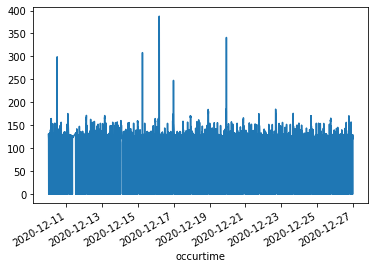

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime(x, "%Y-%m-%d_%H:%M:%S")
series = read_csv('MyFridge.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


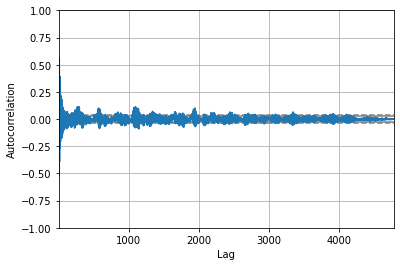

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime(x, "%Y-%m-%d_%H:%M:%S")
series = read_csv('MyFridge.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

autocorrelation_plot(series) #autocorelation plot
pyplot.show()

In [ ]:
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = read_csv('MyFridge.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=63.967
ARIMA(0, 0, 1) RMSE=55.497
ARIMA(0, 0, 2) RMSE=52.999
ARIMA(0, 1, 0) RMSE=64.028
ARIMA(0, 1, 1) RMSE=64.039
ARIMA(0, 1, 2) RMSE=55.501
ARIMA(0, 2, 0) RMSE=91.849


In [ ]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.5MB 10.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

     |████████████████████████████████| 1.5MB 14.6MB/s 


In [ ]:
stepwise_fit=auto_arima(series.dropna(),trace=True,supress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=49985.218, Time=6.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=53314.857, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=52006.012, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=52054.787, Time=1.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57362.949, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=51569.794, Time=2.86 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=51163.653, Time=3.88 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=50005.152, Time=6.99 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=49981.439, Time=6.84 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=51446.184, Time=3.96 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=49982.921, Time=5.67 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=49974.395, Time=6.67 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=51121.690, Time=6.63 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=49978.202, Time=6.50 sec
 ARIMA(2,0,5)(0,0,0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


                               SARIMAX Results                                
Dep. Variable:                  power   No. Observations:                 4777
Model:                 ARIMA(2, 0, 4)   Log Likelihood              -24979.197
Date:                Sat, 01 May 2021   AIC                          49974.395
Time:                        02:32:48   BIC                          50026.168
Sample:                    12-10-2020   HQIC                         49992.582
                         - 12-26-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.0912      0.918     80.728      0.000      72.292      75.890
ar.L1          1.2611      0.010    132.499      0.000       1.242       1.280
ar.L2         -0.9462      0.007   -127.932      0.0

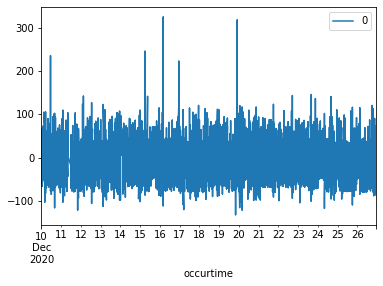

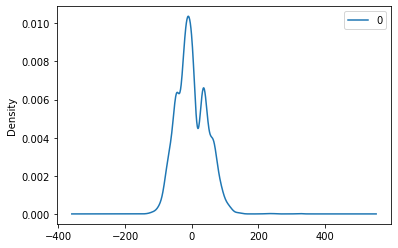

                 0
count  4777.000000
mean      0.008350
std      45.158177
min    -131.654043
25%     -30.182047
50%      -5.352167
75%      33.760539
max     324.777095


In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime(x, "%Y-%m-%d_%H:%M:%S")
series = read_csv('MyFridge.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('H')
# fit model

model = ARIMA(series, order=(2,0,4))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


predicted=60.587530, expected=122.720000
predicted=64.593861, expected=0.000000
predicted=37.316477, expected=0.000000
predicted=39.574286, expected=0.000000
predicted=64.476944, expected=152.400000
predicted=133.481218, expected=130.240000
predicted=136.231047, expected=126.960000
predicted=90.283703, expected=123.680000
predicted=56.767527, expected=120.800000
predicted=53.860770, expected=0.000000
predicted=29.822430, expected=0.000000
predicted=40.026240, expected=0.000000
predicted=70.153800, expected=0.000000
predicted=81.681730, expected=137.680000
predicted=123.511936, expected=131.920000
predicted=119.104414, expected=128.080000
predicted=81.002805, expected=125.280000
predicted=58.834174, expected=122.640000
predicted=63.247425, expected=0.000000
predicted=37.264322, expected=0.000000
predicted=40.570862, expected=0.000000
predicted=65.243834, expected=0.000000
predicted=76.446430, expected=136.560000
predicted=121.616984, expected=130.000000
predicted=120.575293, expected=12

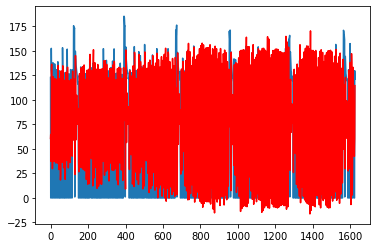

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime(x, "%Y-%m-%d_%H:%M:%S")
series = read_csv('MyFridge.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,4))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

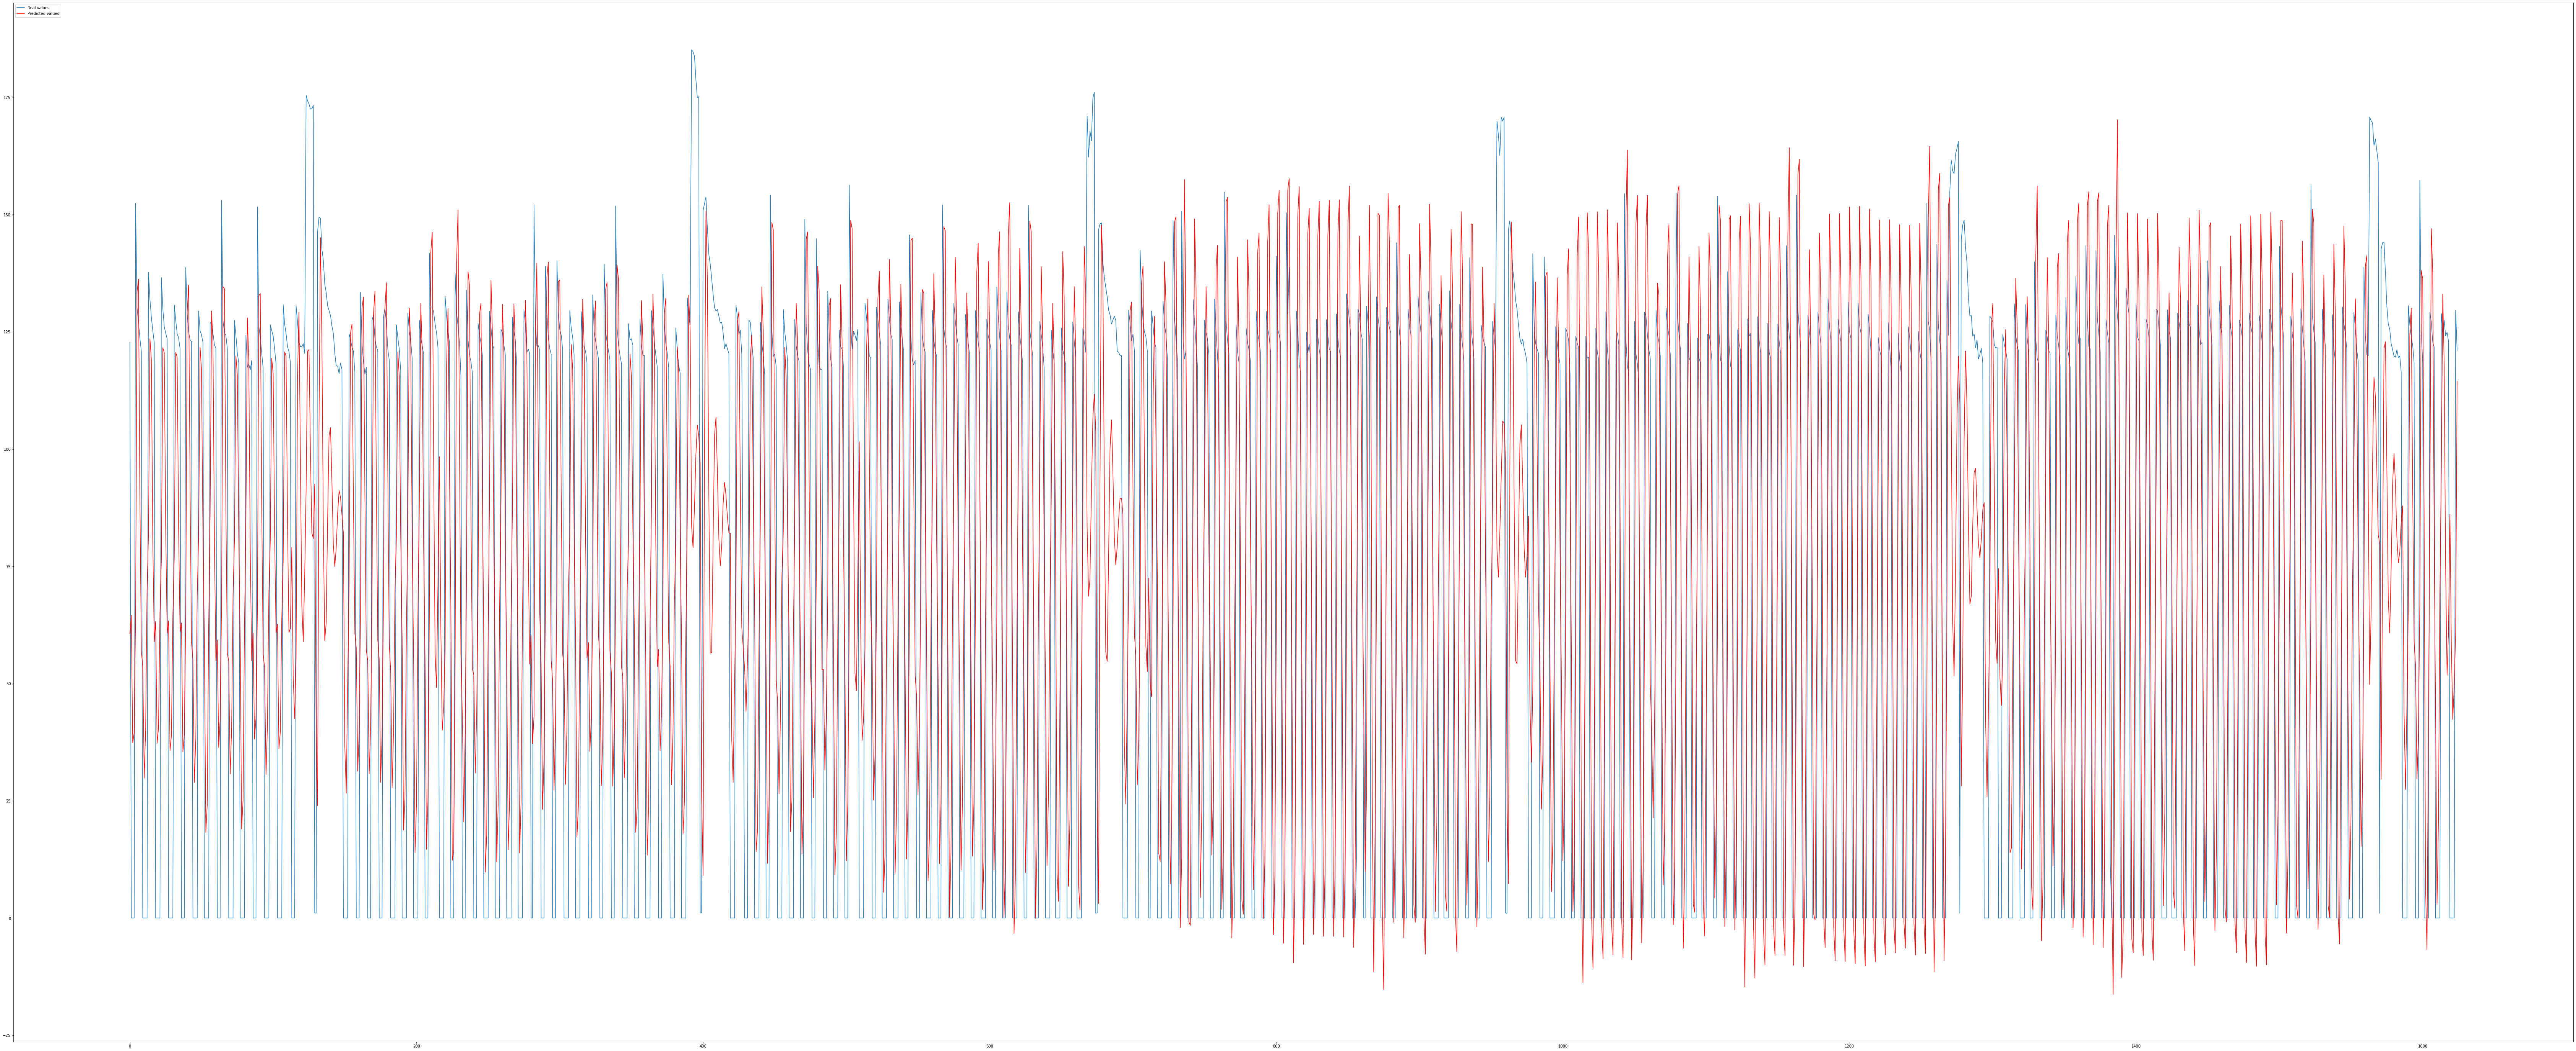

In [ ]:
pyplot.rcParams["figure.figsize"] = (120,50)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(["Real values", "Predicted values"], loc="upper left")
pyplot.show()